# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
### импортируйте нужные библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import plotly.express as px

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv(r'CSV\1_5_diabetes_prediction_dataset.csv')

In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [7]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [8]:
df.gender.describe()

count     100000
unique         3
top       Female
freq       58552
Name: gender, dtype: object

**Вывод:**
- Всего пациентов в датасете присутствует `100_000`. Среди них `~59%` женщин.
- По возрасту пациенты представлены от младенцев до `80` летних. Средний возрас `42` года (что примерно равно медиане). Межквартильный размах `24 - 60` лет.
- `7%` пациентов страдает гипертонией, `4%` - болезнями сердца.
- `3-й` квартиль (`75%` пациентов) ИМТ составляет `29,6`, т.е. большинство пациентов ожирением не страдает, но `>50%` имеют избыточную массу тела (медиана ИМТ равна `27,32`).
- Более чем у `75%` пациентов уровень сахара в крови меньше `6,5%`, что является нормой.
- Медиана уровня глюкозы состаляет `140`, а межквартильный размах `100 - 159`. При этом максимальный уровень достигает целых `300`.
- Диабетом страдает `8,5%` пациентов.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [9]:
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)

3854

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [10]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [11]:
df.sample(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
53408    Male  22.0             0              0         current  27.32   
17172    Male  78.0             0              0     not current  33.83   
7695   Female  72.0             0              1           never  27.32   
18319    Male  34.0             0              0         No Info  27.32   
39136    Male  66.0             0              1     not current  27.64   

       HbA1c_level  blood_glucose_level  diabetes  
53408          6.0                   90         0  
17172          4.5                  140         0  
7695           5.7                   85         0  
18319          5.0                  155         0  
39136          6.6                  280         1

In [12]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

**Вывод:**
- В датасете находилось `3854` дубликата.
- Отсутствующих значений не обнаружено, в том числе в столбцах категориального типа. 
- Все столбцы имеют правильный тип данных.
- Недостатотк датасета: у трети пациентов неизвестна их история курения, что может помешать найти зависимость диабета от употребления табака.

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


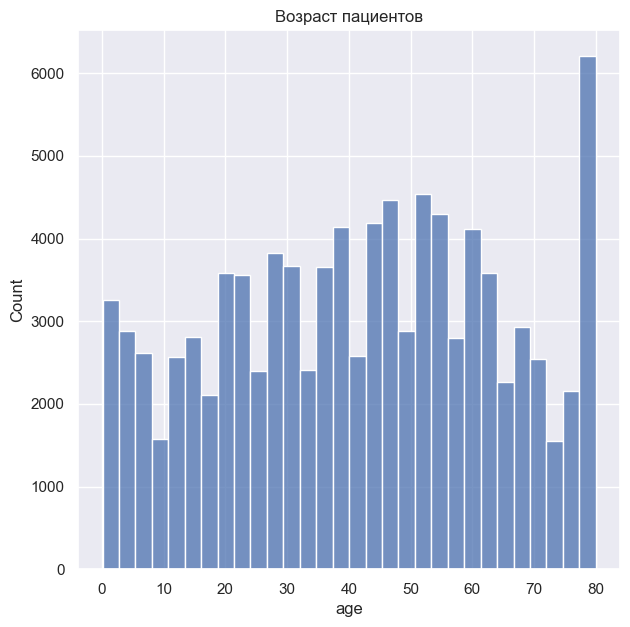

In [14]:
plt.figure(figsize=(7,7))
plt.title('Возраст пациентов')
sns.histplot(df.age, bins=30)
plt.xlabel('age')
plt.show()

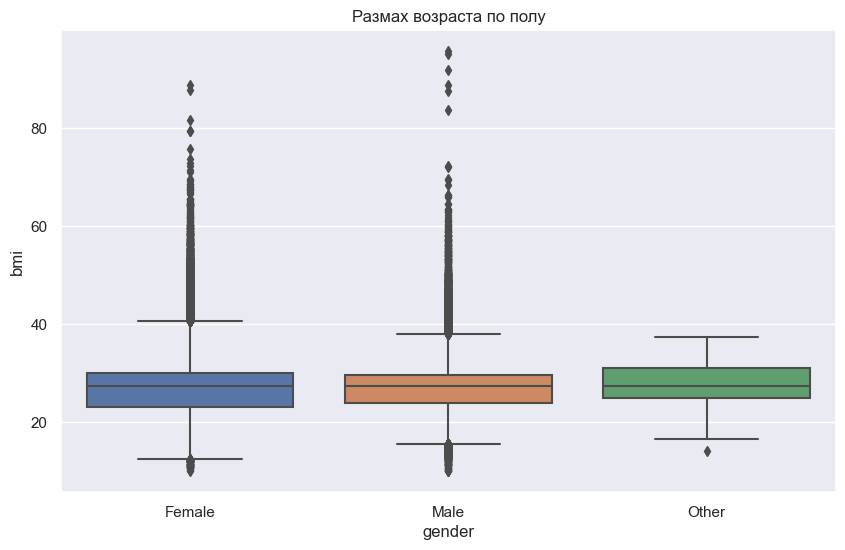

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('Размах возраста по полу')
plt.show()

Самым чатыи возрастом явлется `80 лет`. Мужчины и женщины представлены примерно одинаковыми возрастными группами.

In [16]:

fig = px.histogram(df, x='bmi', nbins=20)
fig.show()

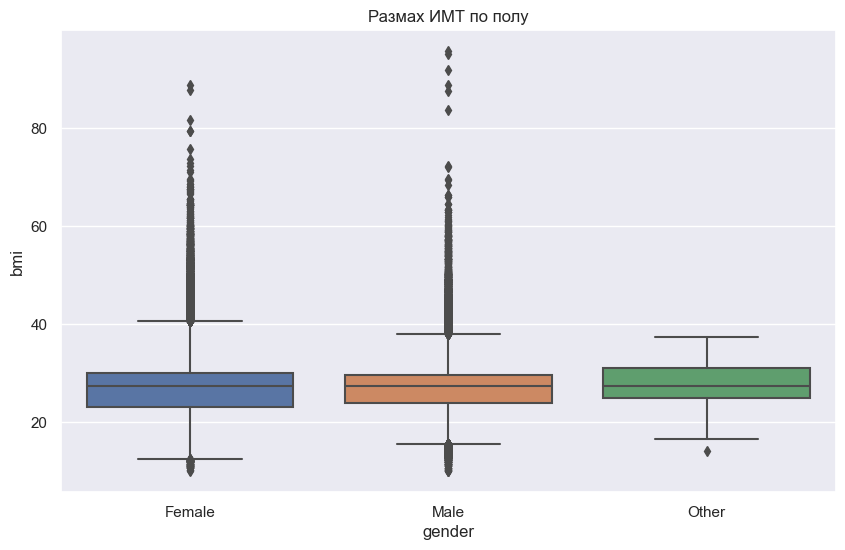

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('Размах ИМТ по полу')
plt.show()

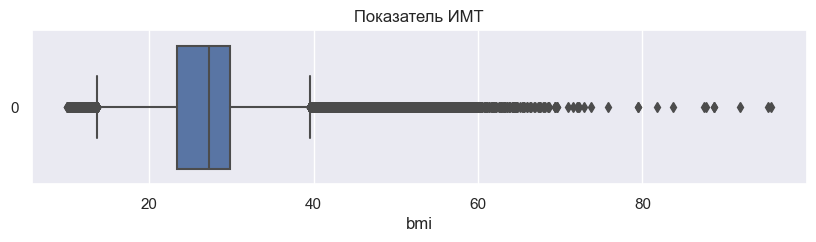

In [18]:
plt.figure(figsize=(10,2))
plt.title('Показатель ИМТ')
sns.boxplot(df.bmi, orient='h')
plt.xlabel('bmi')
plt.show()

В среднем чуть более высоким значением ИМТ обладают женщины. А у мужчин больше выбросов. И в целом выбросов по этому параметру очень много.

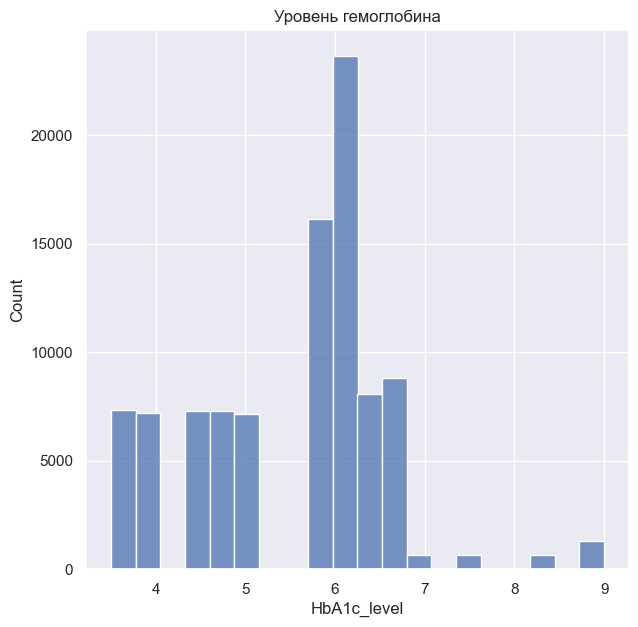

In [19]:
plt.figure(figsize=(7,7))
plt.title('Уровень гемоглобина')
sns.histplot(df.HbA1c_level, bins=20)
plt.xlabel('HbA1c_level')
plt.show()

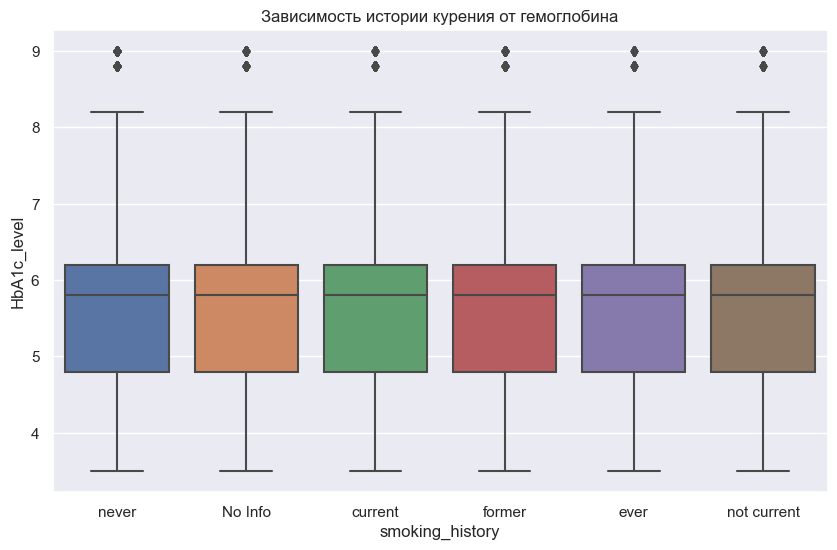

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='HbA1c_level', data=df)
plt.title('Зависимость истории курения от гемоглобина')
plt.show()

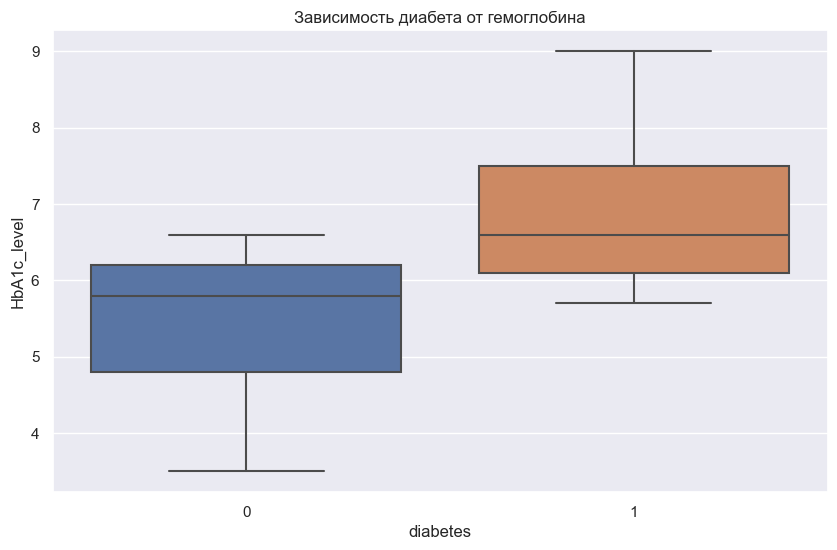

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Зависимость диабета от гемоглобина')
plt.show()

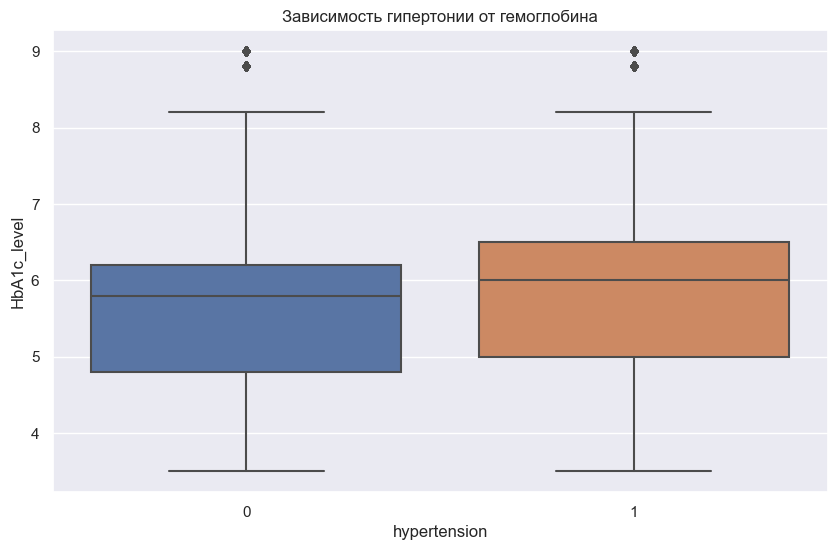

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='HbA1c_level', data=df)
plt.title('Зависимость гипертонии от гемоглобина')
plt.show()

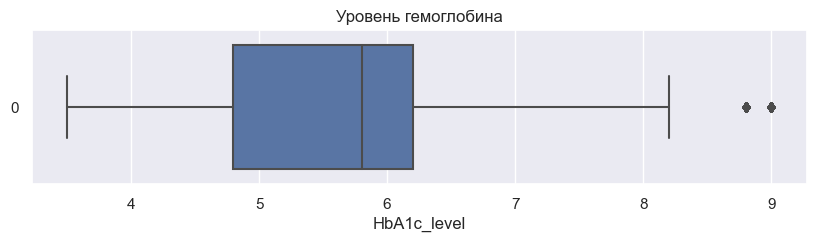

In [23]:
plt.figure(figsize=(10,2))
plt.title('Уровень гемоглобина')
sns.boxplot(df.HbA1c_level, orient='h')
plt.xlabel('HbA1c_level')
plt.show()

История курения на уровень гемоглобина никак не влияет, а при диабете его уровень намного выше.
У людей с гипертонией уровень гемоглобина слегка выше (разность медиан составляет `0.2`).
Присутствует малое число выбросов при уровне гемоглобина `>8.5`.

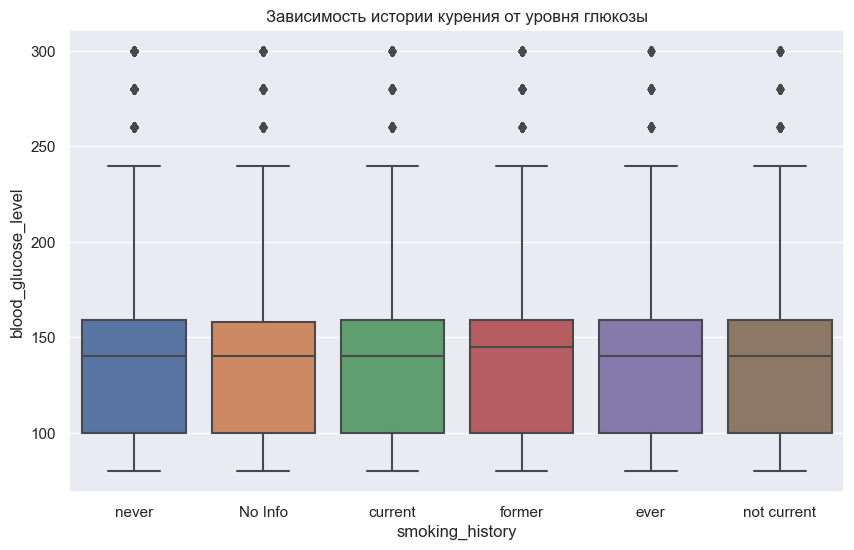

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df)
plt.title('Зависимость истории курения от уровня глюкозы')
plt.show()

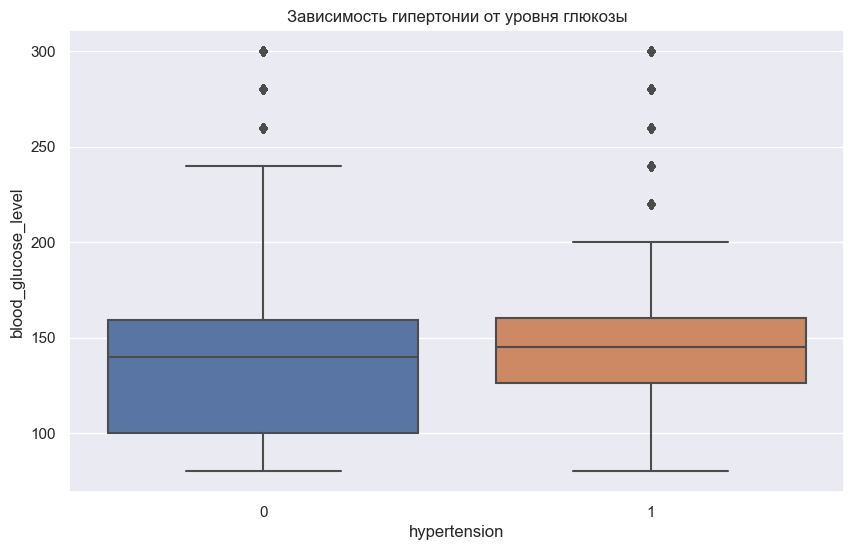

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='blood_glucose_level', data=df)
plt.title('Зависимость гипертонии от уровня глюкозы')
plt.show()

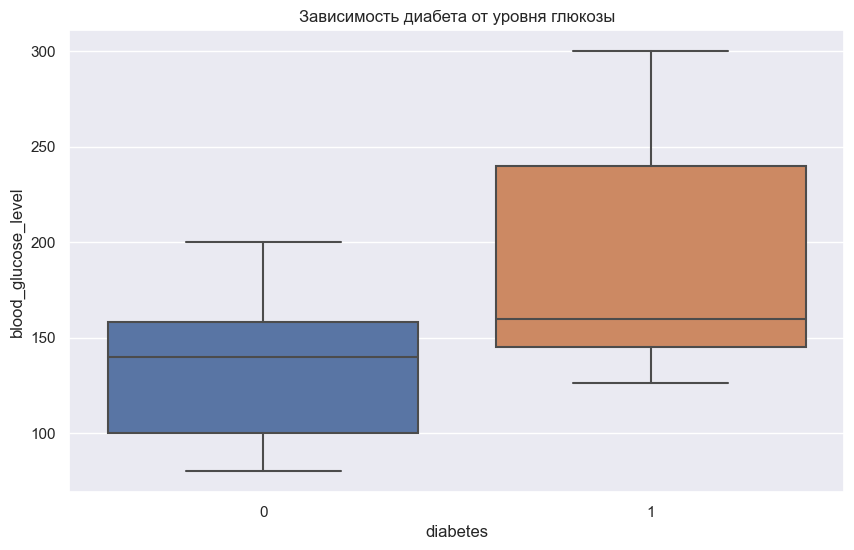

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Зависимость диабета от уровня глюкозы')
plt.show()

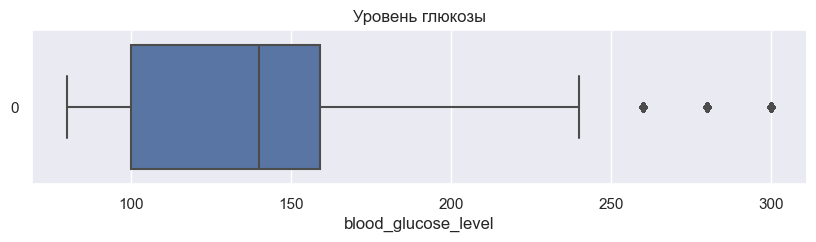

In [27]:
plt.figure(figsize=(10,2))
plt.title('Уровень глюкозы')
sns.boxplot(df.blood_glucose_level, orient='h')
plt.xlabel('blood_glucose_level')
plt.show()

In [28]:
fig = px.histogram(df, x='blood_glucose_level', nbins=25)
fig.show()

На уровень глюкозы курение не оказало влияния. При гипертонии уровень клюкохы незначительно выше (разность медиан составляет `5`).
Есть некоторое количество выбросов при уровне глюкозы `>250`.

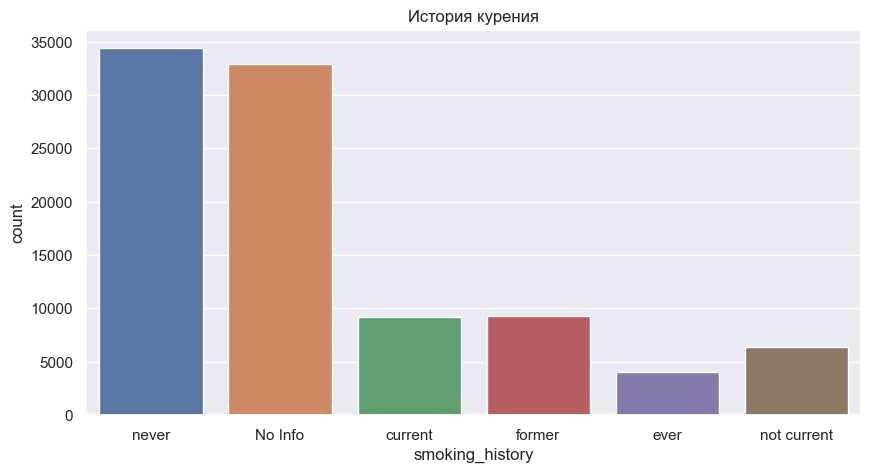

In [29]:
plt.figure(figsize=(10, 5))
plt.title('История курения')
sns.countplot(x='smoking_history', data=df)
plt.show()

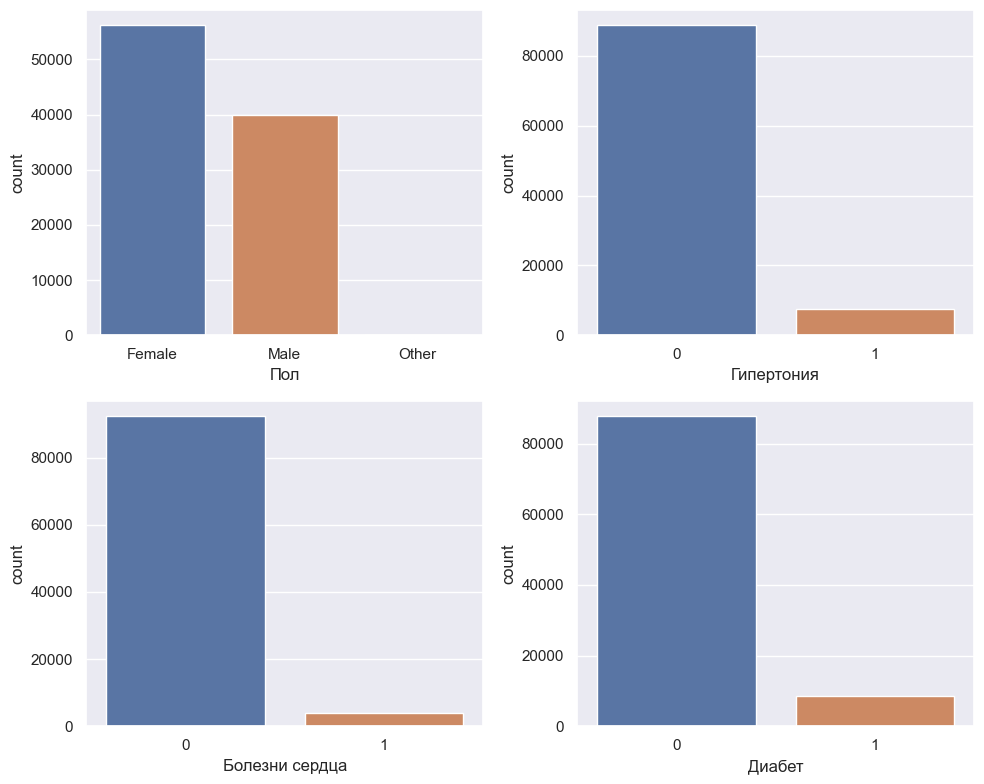

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.countplot(x='gender', data=df, ax=ax[0, 0])
sns.countplot(x='hypertension', data=df, ax=ax[0, 1])
sns.countplot(x='heart_disease', data=df, ax=ax[1, 0])
sns.countplot(x='diabetes', data=df, ax=ax[1, 1])

ax[0, 0].set_xlabel('Пол')
ax[0, 1].set_xlabel('Гипертония')
ax[1, 0].set_xlabel('Болезни сердца')
ax[1, 1].set_xlabel('Диабет')

plt.tight_layout()
plt.show()

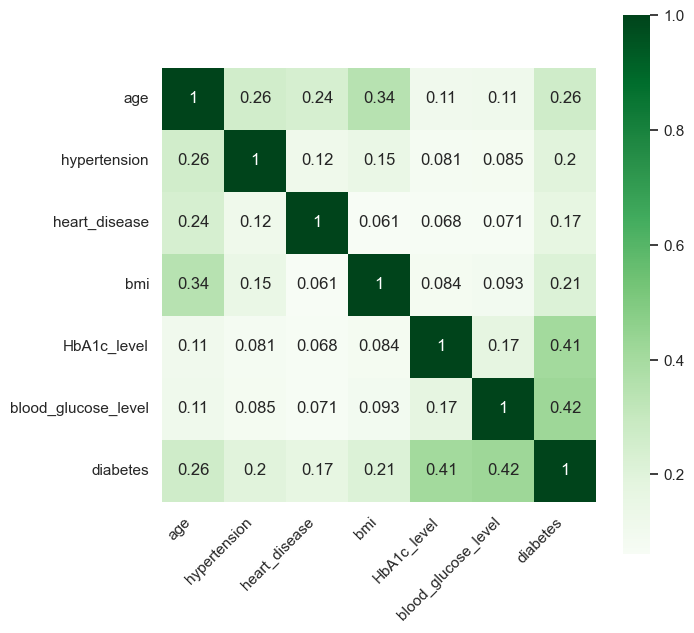

In [31]:
numeric_columns = df.select_dtypes(include='number').columns
tmp = df[numeric_columns].corr()

plt.figure(figsize=(7,7))
ax = sns.heatmap(tmp, annot=True, cmap='Greens')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.imshow(tmp)
plt.show()

**Вывод:**
- Диабет наиболее коррелирует с уровнем глюкозы и гемоглобина (`>0.4`).
- С остальными признаками корреляция слабая (`<0.3`).
- Курение на диабет, уровень глюкозы и гемоглобина не влияет.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.4+ MB


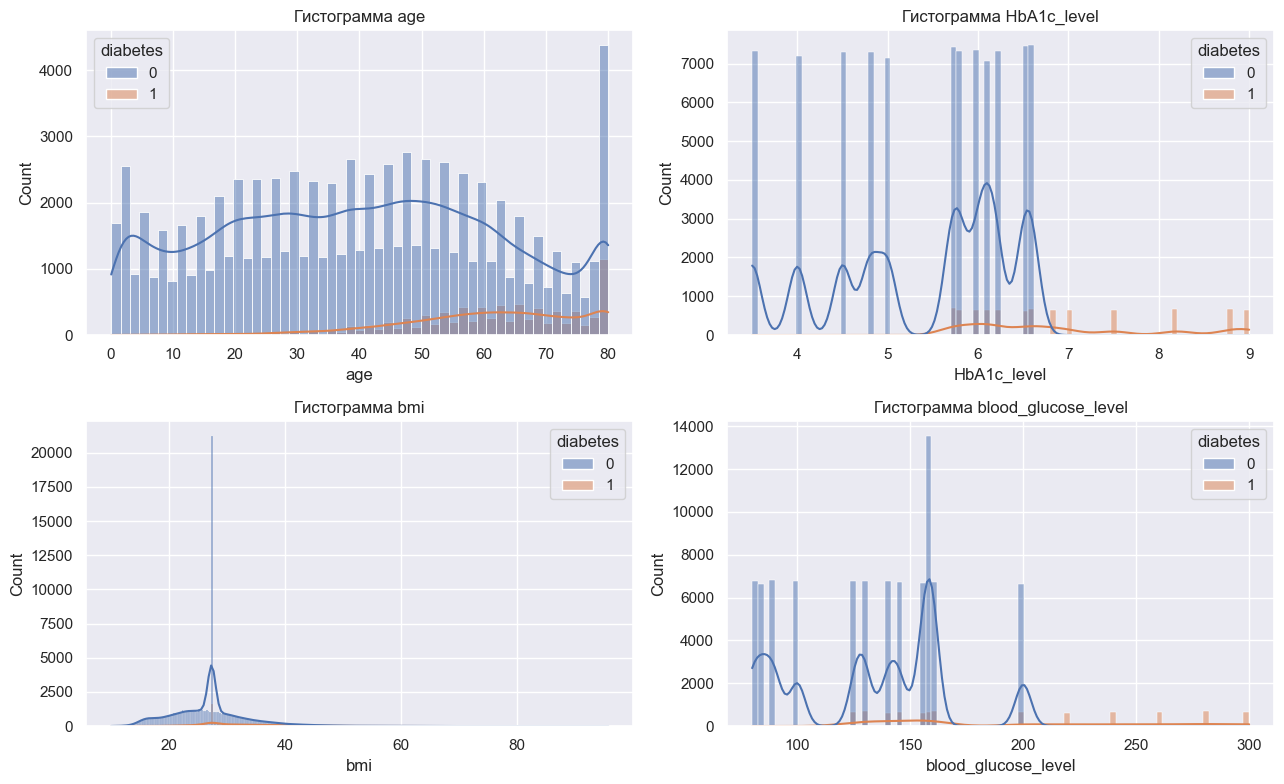

In [33]:
numeric_columns = ['age', 'HbA1c_level', 'bmi', 'blood_glucose_level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, kde=True, hue='diabetes', ax=axes[i])
    axes[i].set_title(f"Гистограмма {column}")
    
plt.tight_layout()
plt.show()


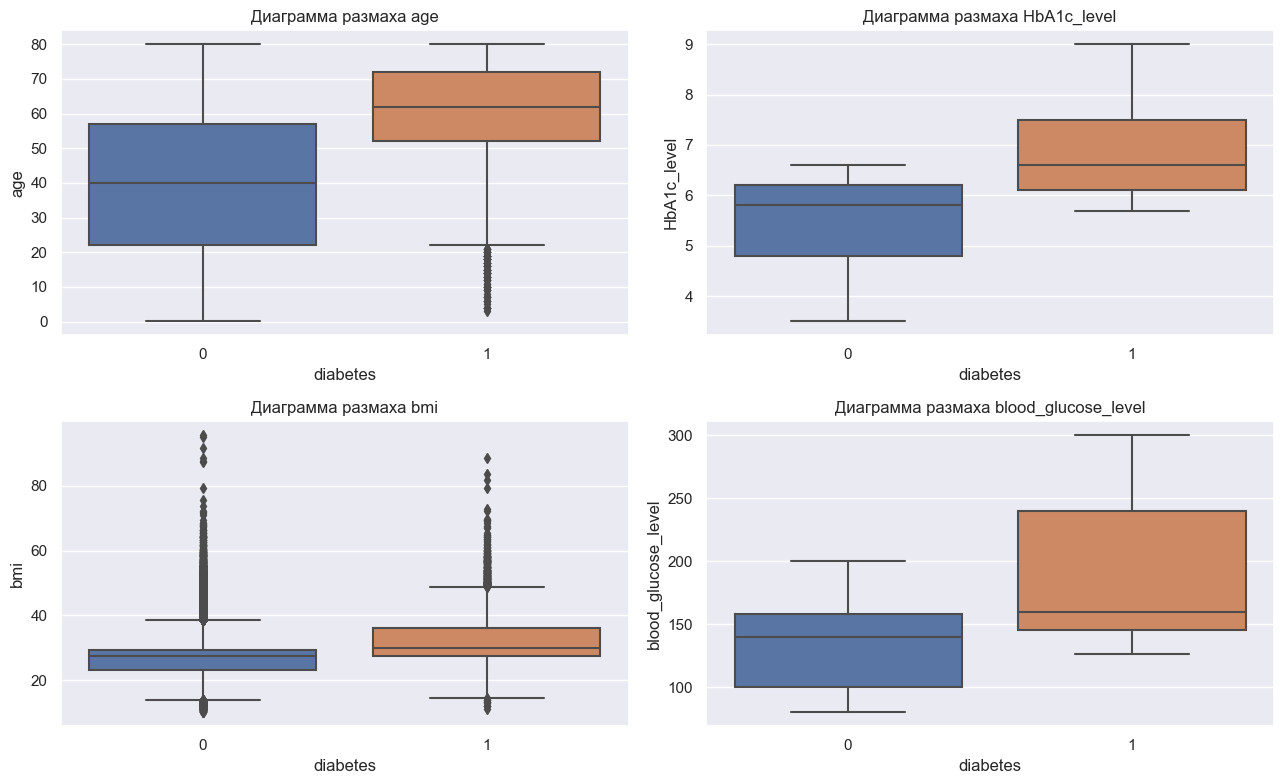

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='diabetes', y=column, ax=axes[i])
    axes[i].set_title(f"Диаграмма размаха {column}")
    
plt.tight_layout()
plt.show()

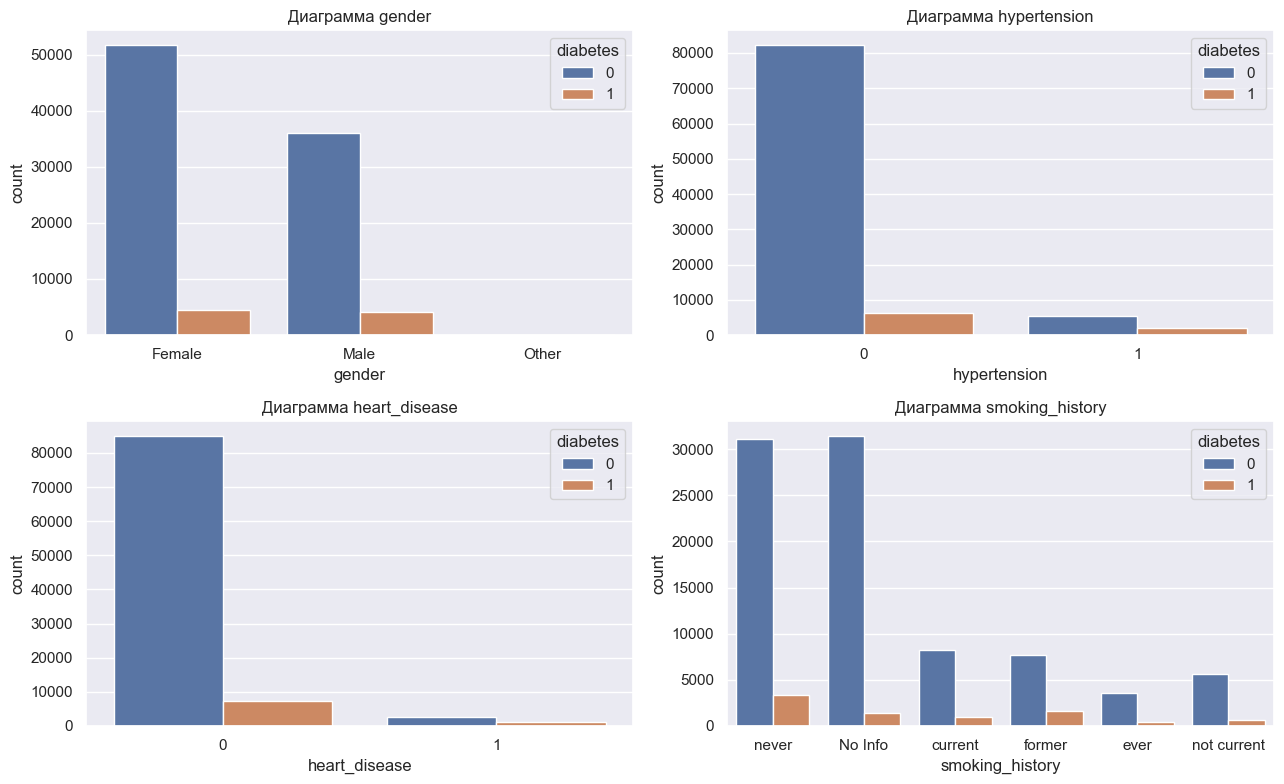

In [35]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, hue='diabetes', ax=axes[i])
    axes[i].set_title(f"Диаграмма {column}")
    
plt.tight_layout()
plt.show()

**Вывод:**
- Диабетом страдают в основном взрослые люди, возраста `40+`.
- Можно предпооложить о небольшом росте показателя ИМТ при диабете.
- При диабете наблюдается высокий уровевень гемоглобина, но у значительного количества людей он находится в пределах `5.5 - 7`, но в этих же предлах уровень гемоглобина находится и у здоровых людей.
- При диабете уровень глюкозы значительно выше.
- Среди мужчин и женщин диабет встречатся одинаково часто.
- Среди диабетиков чаще встречается гипертония. 

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

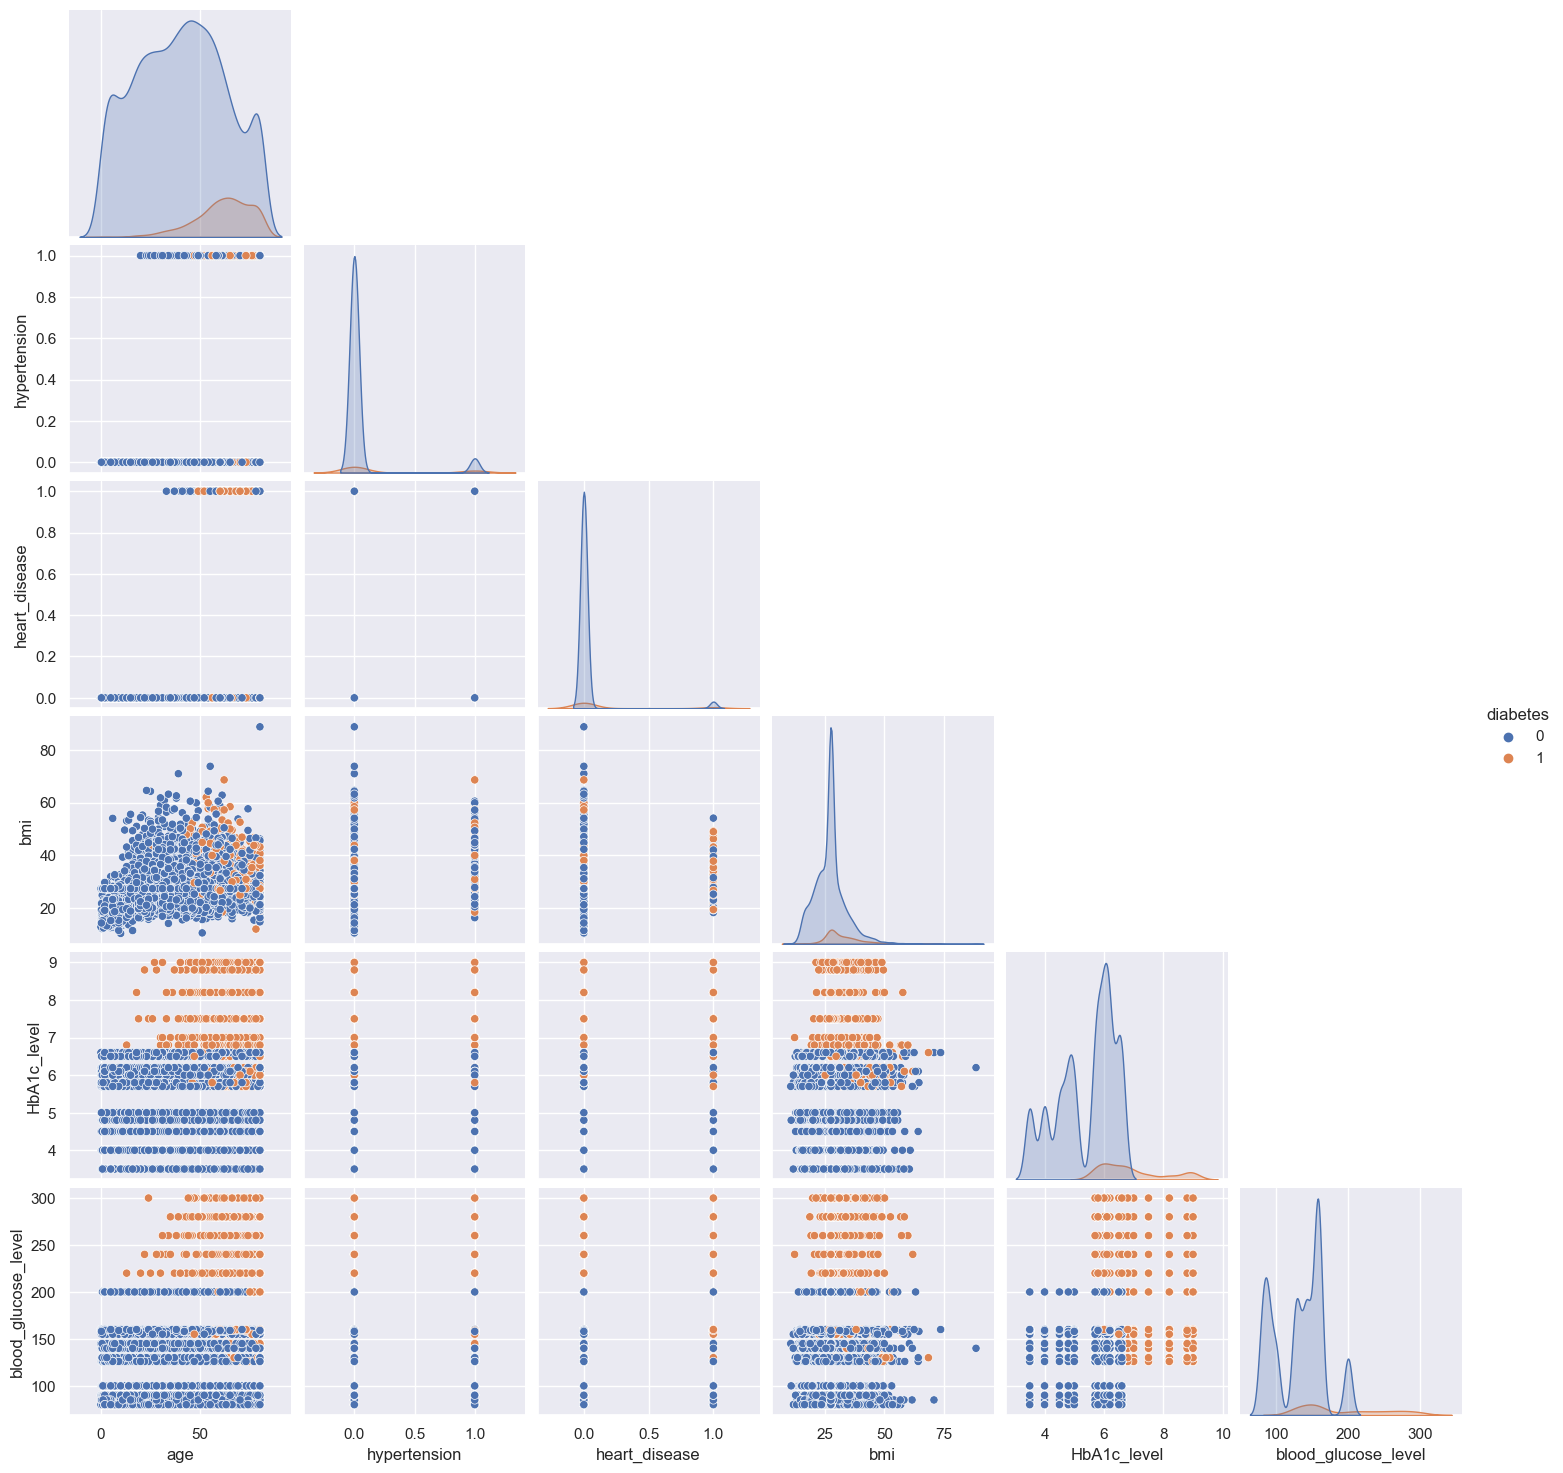

In [36]:
sns.pairplot(df.sample(10000), corner=True, hue='diabetes')

<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

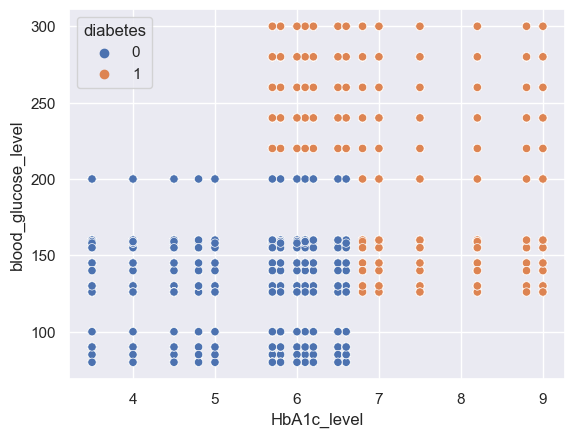

In [37]:
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes')

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


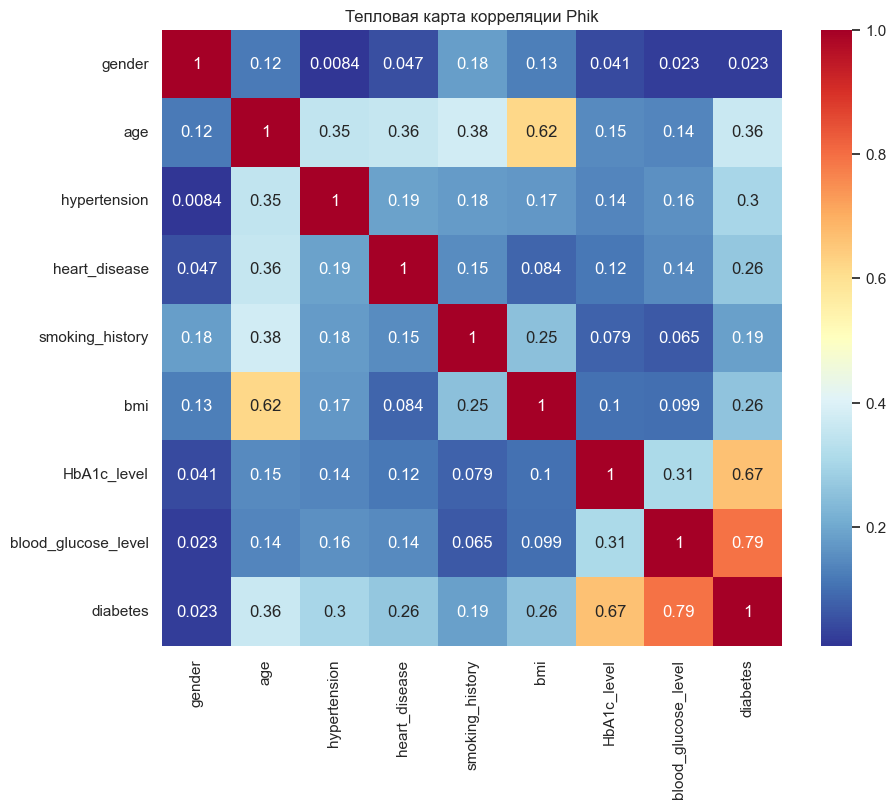

In [38]:
import phik

correlation_matrix = df.phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r')
plt.title('Тепловая карта корреляции Phik')
plt.show()

**Вывод:**
- Матрица корреляции с помощью относительно нового метода `Phik` дала иные результаты, по сравнению с методом `Пирсона`. И эта матрица так же учитывает категориальные признаки.
- Теперь мы видим, что диабет сильно коррелирует с уровнем глюкозы и гемоглобина. И немного коррелирует с возрастом и гипертонией (о чём уже был сделан вывод на основе других графиков).
- Были построены матрицы рассеяния с помощью метода `pairplot` из `seaborn`. Самой интересной матрицей оказалась между уровнем глюкозы и гемоглобина. На ней очень чётко разделились диабетики и здоровые. Так, что можно с помощью двух линейных функций их друг от друга отделить.